In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('D:/archive/data_date.csv')

# Check the first few rows of the data
print(data.head())

# Check the data types of each column
print(data.dtypes)


         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63
Date         object
Country      object
Status       object
AQI Value     int64
dtype: object


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
# Load data
data = pd.read_csv("D:/archive/data_date.csv")

# Display first few rows and data types
print(data.head())
print(data.dtypes)


         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63
Date         object
Country      object
Status       object
AQI Value     int64
dtype: object


In [4]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year, Month, Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop Date column
data.drop('Date', axis=1, inplace=True)

# One-hot encode 'Country' and 'Status'
data = pd.get_dummies(data, columns=['Country', 'Status'], drop_first=True)

# Display processed data
print(data.head())


   AQI Value  Year  Month  Day  Country_Algeria  Country_Andorra  \
0         14  2022      7   21                0                0   
1         65  2022      7   21                1                0   
2         55  2022      7   21                0                1   
3        113  2022      7   21                0                0   
4         63  2022      7   21                0                0   

   Country_Angola  Country_Argentina  Country_Armenia  Country_Australia  ...  \
0               0                  0                0                  0  ...   
1               0                  0                0                  0  ...   
2               0                  0                0                  0  ...   
3               1                  0                0                  0  ...   
4               0                  1                0                  0  ...   

   Country_Uzbekistan  Country_Vatican  Country_Venezuela  Country_Vietnam  \
0                   0     

In [5]:
# Separate features (X) and target (y)
X = data.drop(columns=['AQI Value'])  # Features
y = data['AQI Value']                 # Target


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 7.952983831886483
R-squared: 0.9388952117446714


In [9]:
# Print the first 10 predicted AQI values
print("First 10 Predicted AQI values:", y_pred[:10])


First 10 Predicted AQI values: [243.49        76.15        23.66        62.93        24.745
  69.78466667  20.92164286  70.97        61.69333333 234.71      ]


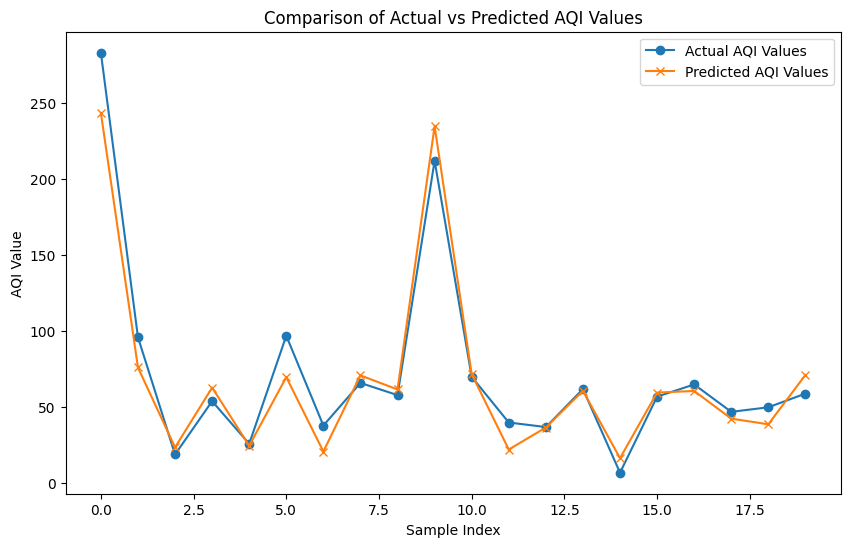

In [10]:
import matplotlib.pyplot as plt

# Select the first 20 values for comparison
y_test_sample = y_test[:20].values
y_pred_sample = y_pred[:20]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_sample)), y_test_sample, label="Actual AQI Values", marker='o')
plt.plot(range(len(y_pred_sample)), y_pred_sample, label="Predicted AQI Values", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("AQI Value")
plt.title("Comparison of Actual vs Predicted AQI Values")
plt.legend()
plt.show()


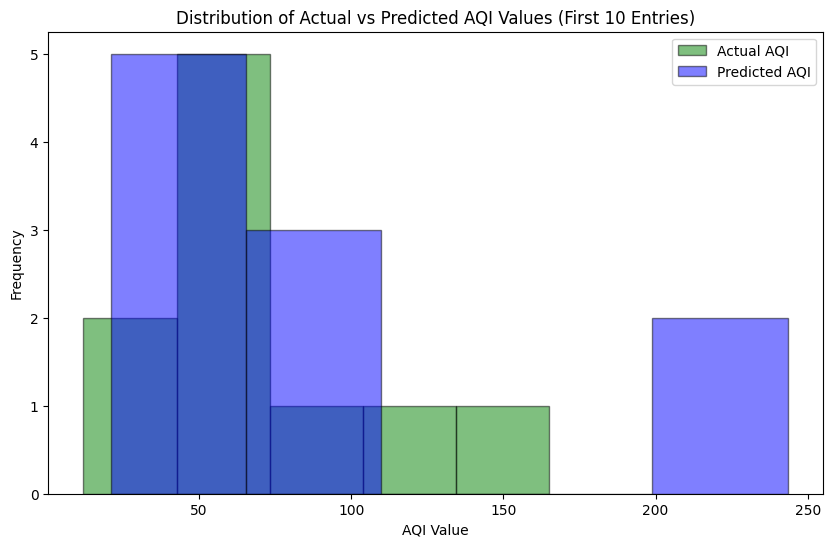

In [12]:
# Actual AQI values for the first 10 entries in the dataset
actual_aqi_10 = data['AQI Value'][:10]

# Plotting the comparison
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.hist(actual_aqi_10, bins=5, alpha=0.5, label='Actual AQI', color='green', edgecolor='black')

# Plotting predicted values
plt.hist(y_pred_sample_10, bins=5, alpha=0.5, label='Predicted AQI', color='blue', edgecolor='black')

# Adding labels and title
plt.title("Distribution of Actual vs Predicted AQI Values (First 10 Entries)")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.legend()

# Show plot
plt.show()


In [14]:
# Assuming that the model (e.g., Random Forest Regressor) is already trained

# Make predictions for the entire dataset
y_pred_all = model.predict(X_test)  # X_test contains the features for the entire dataset

# Print all the predicted values
print("All Predicted AQI values:")
print(y_pred_all)


All Predicted AQI values:
[243.49  76.15  23.66 ...  53.84  31.27  16.42]


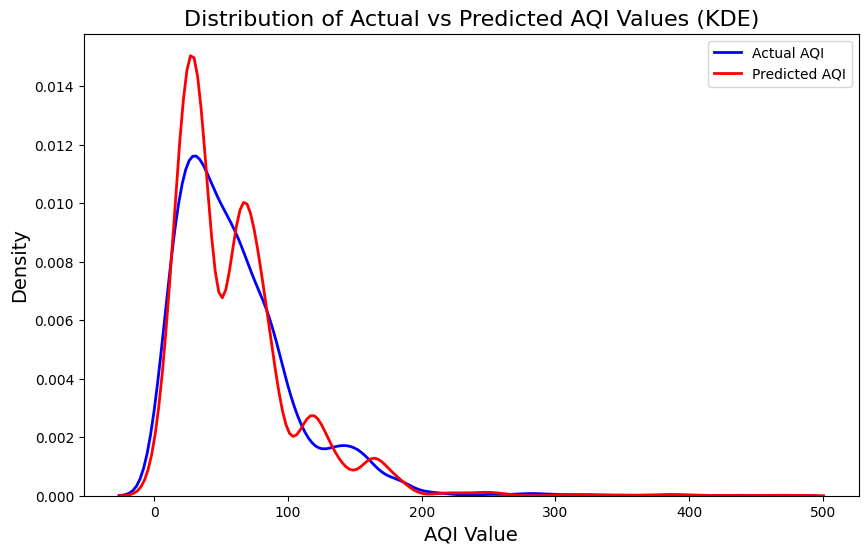

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of actual vs predicted AQI values as KDE (Kernel Density Estimate) without histograms
plt.figure(figsize=(10, 6))

# Plotting actual AQI values
sns.kdeplot(y_test, color='blue', label='Actual AQI', linewidth=2)

# Plotting predicted AQI values
sns.kdeplot(y_pred_all, color='red', label='Predicted AQI', linewidth=2)

# Adding labels and title
plt.title("Distribution of Actual vs Predicted AQI Values (KDE)", fontsize=16)
plt.xlabel("AQI Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()

# Show plot
plt.show()


In [19]:
# Check and clean column names by stripping spaces and converting to lowercase
data.columns = data.columns.str.strip().str.lower()

# Print the cleaned column names
print(data.columns)


Index(['aqi value', 'year', 'month', 'day', 'country_algeria',
       'country_andorra', 'country_angola', 'country_argentina',
       'country_armenia', 'country_australia',
       ...
       'country_uzbekistan', 'country_vatican', 'country_venezuela',
       'country_vietnam', 'country_zambia', 'status_hazardous',
       'status_moderate', 'status_unhealthy',
       'status_unhealthy for sensitive groups', 'status_very unhealthy'],
      dtype='object', length=150)


In [20]:
# Separate the features (X) and target (y)
X = data.drop(columns=['aqi value'])  # All columns except 'aqi value'
y = data['aqi value']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the first 10 predictions and the corresponding actual values
print("First 10 predicted AQI values:", y_pred[:10])
print("First 10 actual AQI values:", y_test.iloc[:10].values)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


First 10 predicted AQI values: [243.49        76.15        23.66        62.93        24.745
  69.78466667  20.92164286  70.97        61.69333333 234.71      ]
First 10 actual AQI values: [283  96  19  54  26  97  38  66  58 212]
Mean Squared Error: 129.1240302677631
R-squared: 0.9388952117446714
